In [1]:
!nvidia-smi

Sat Aug  3 20:42:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [4]:
!yolo task=detect mode=train model=yolov8m.pt data='/content/drive/MyDrive/player-data/custom.yaml' epochs=20 imgsz=860

100% 49.7M/49.7M [00:00<00:00, 132MB/s]
Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/player-data/custom.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=860, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

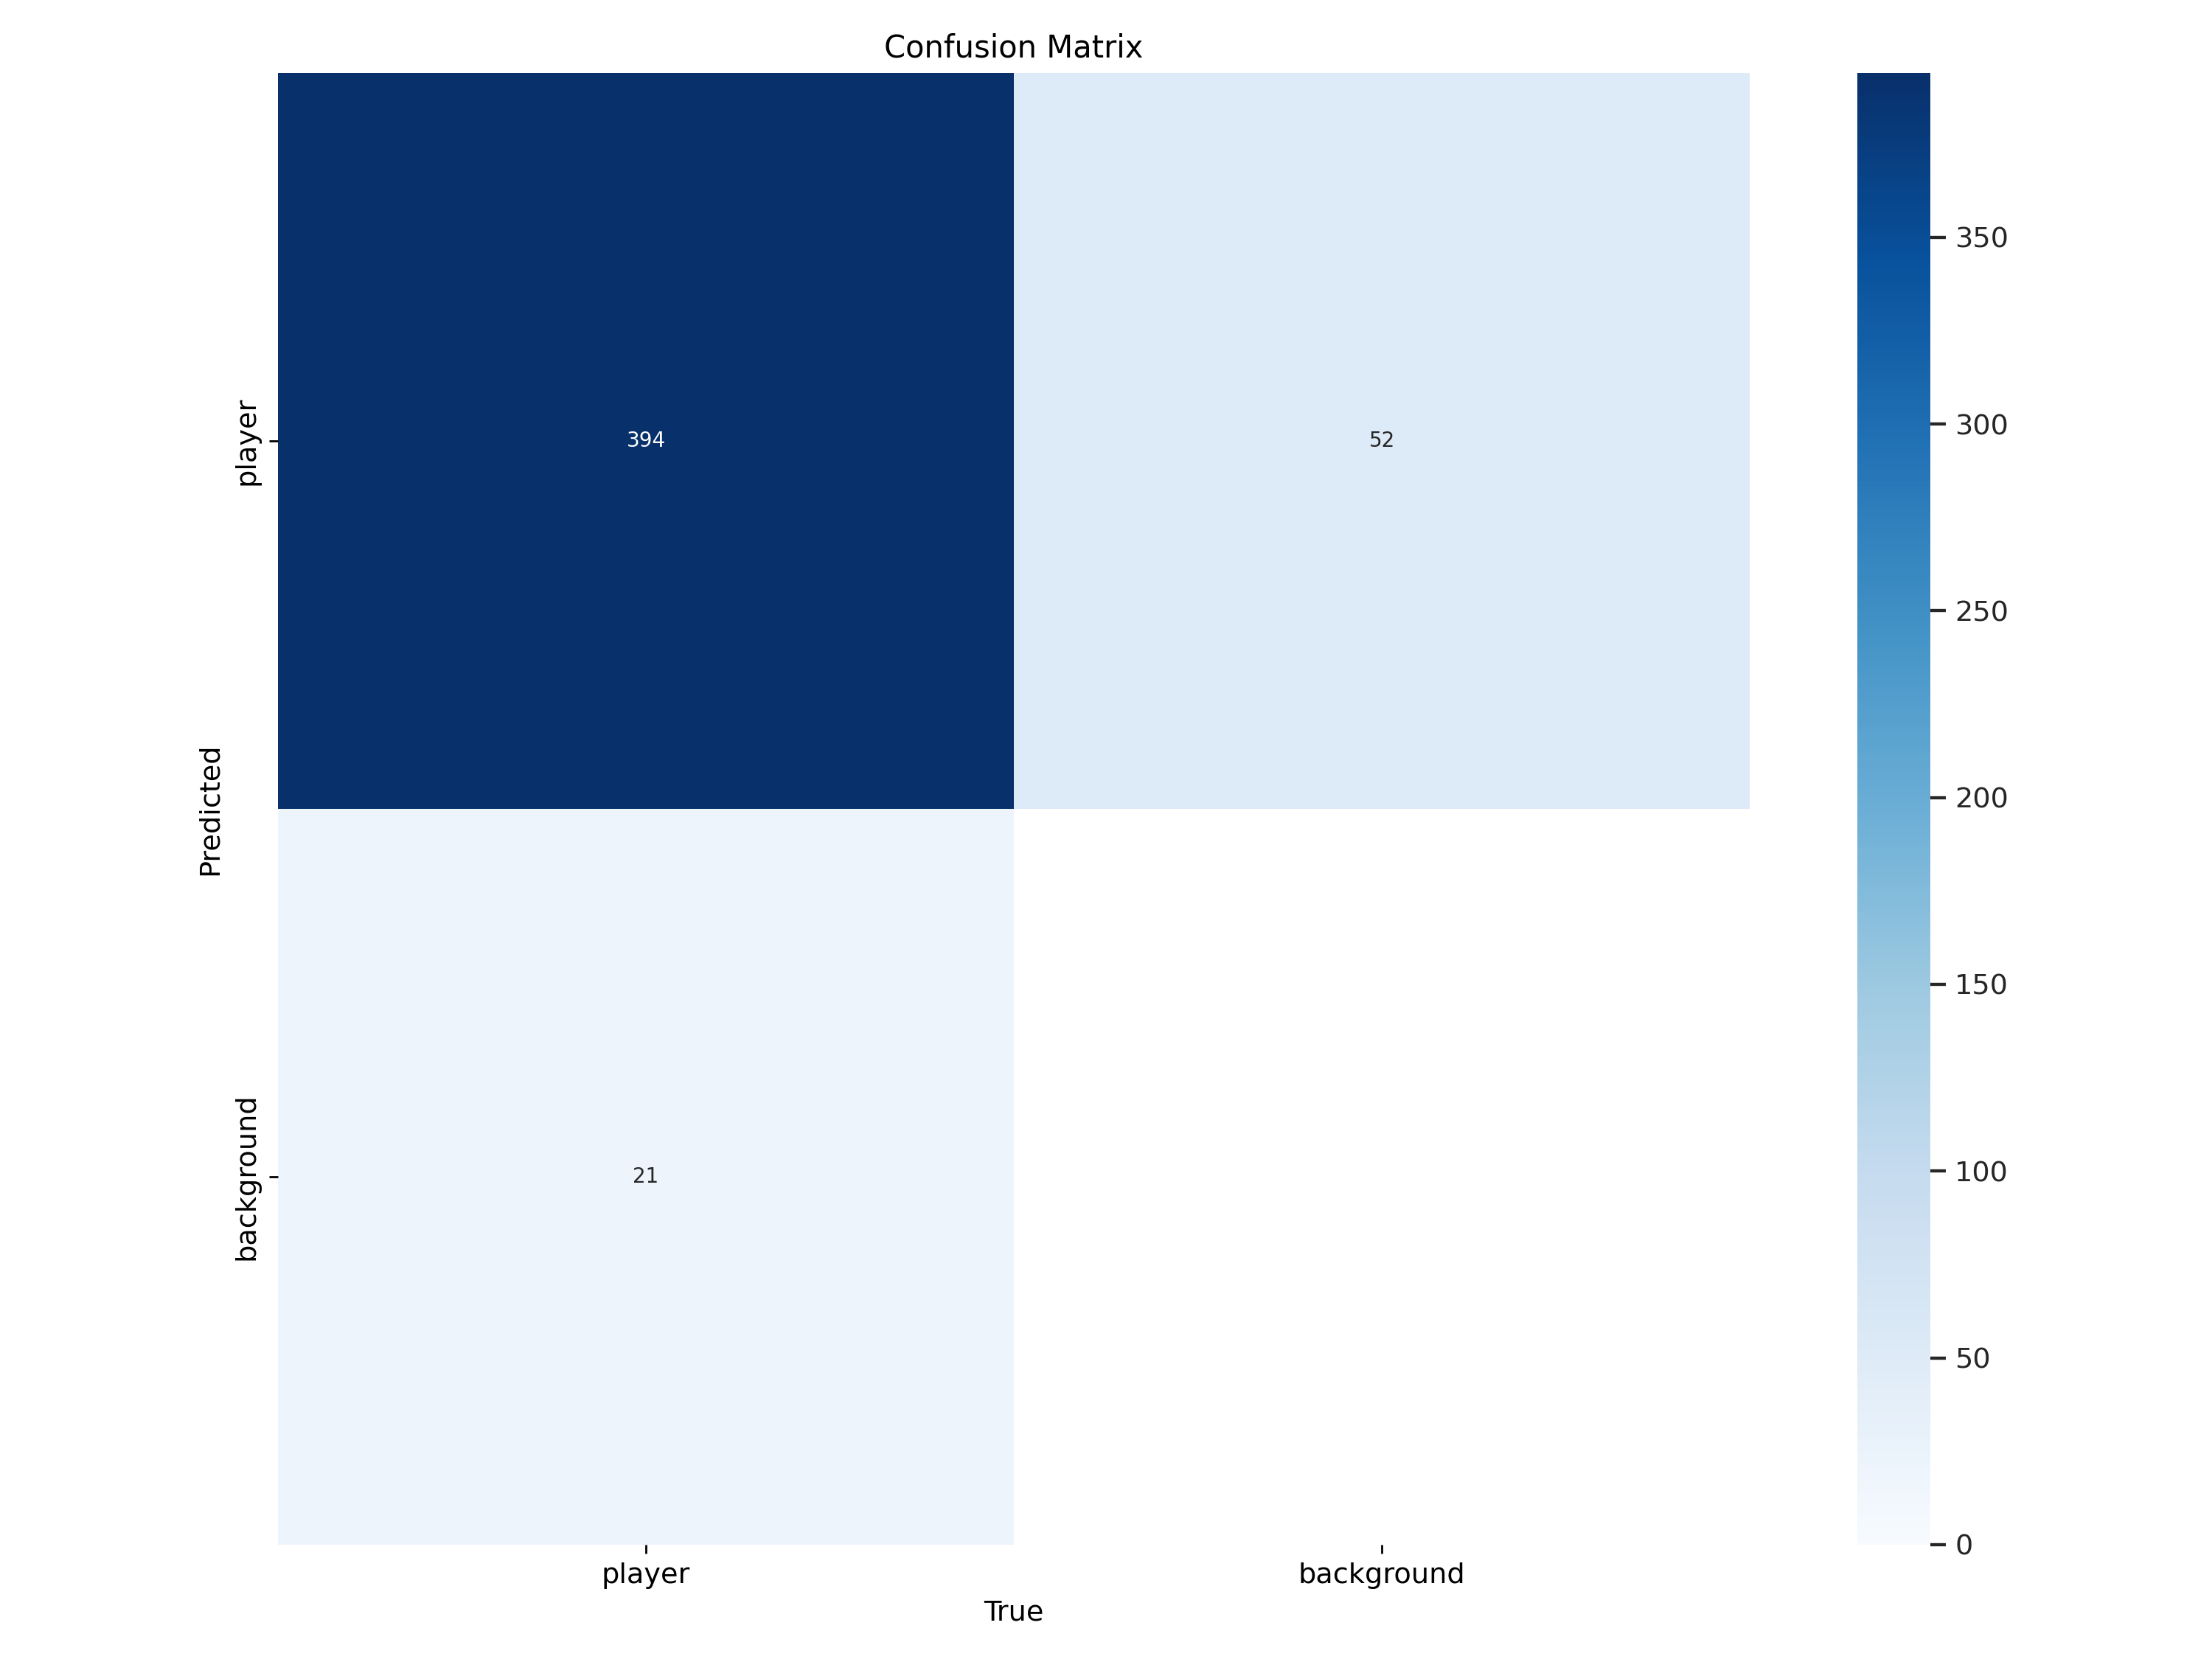

In [5]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=800)

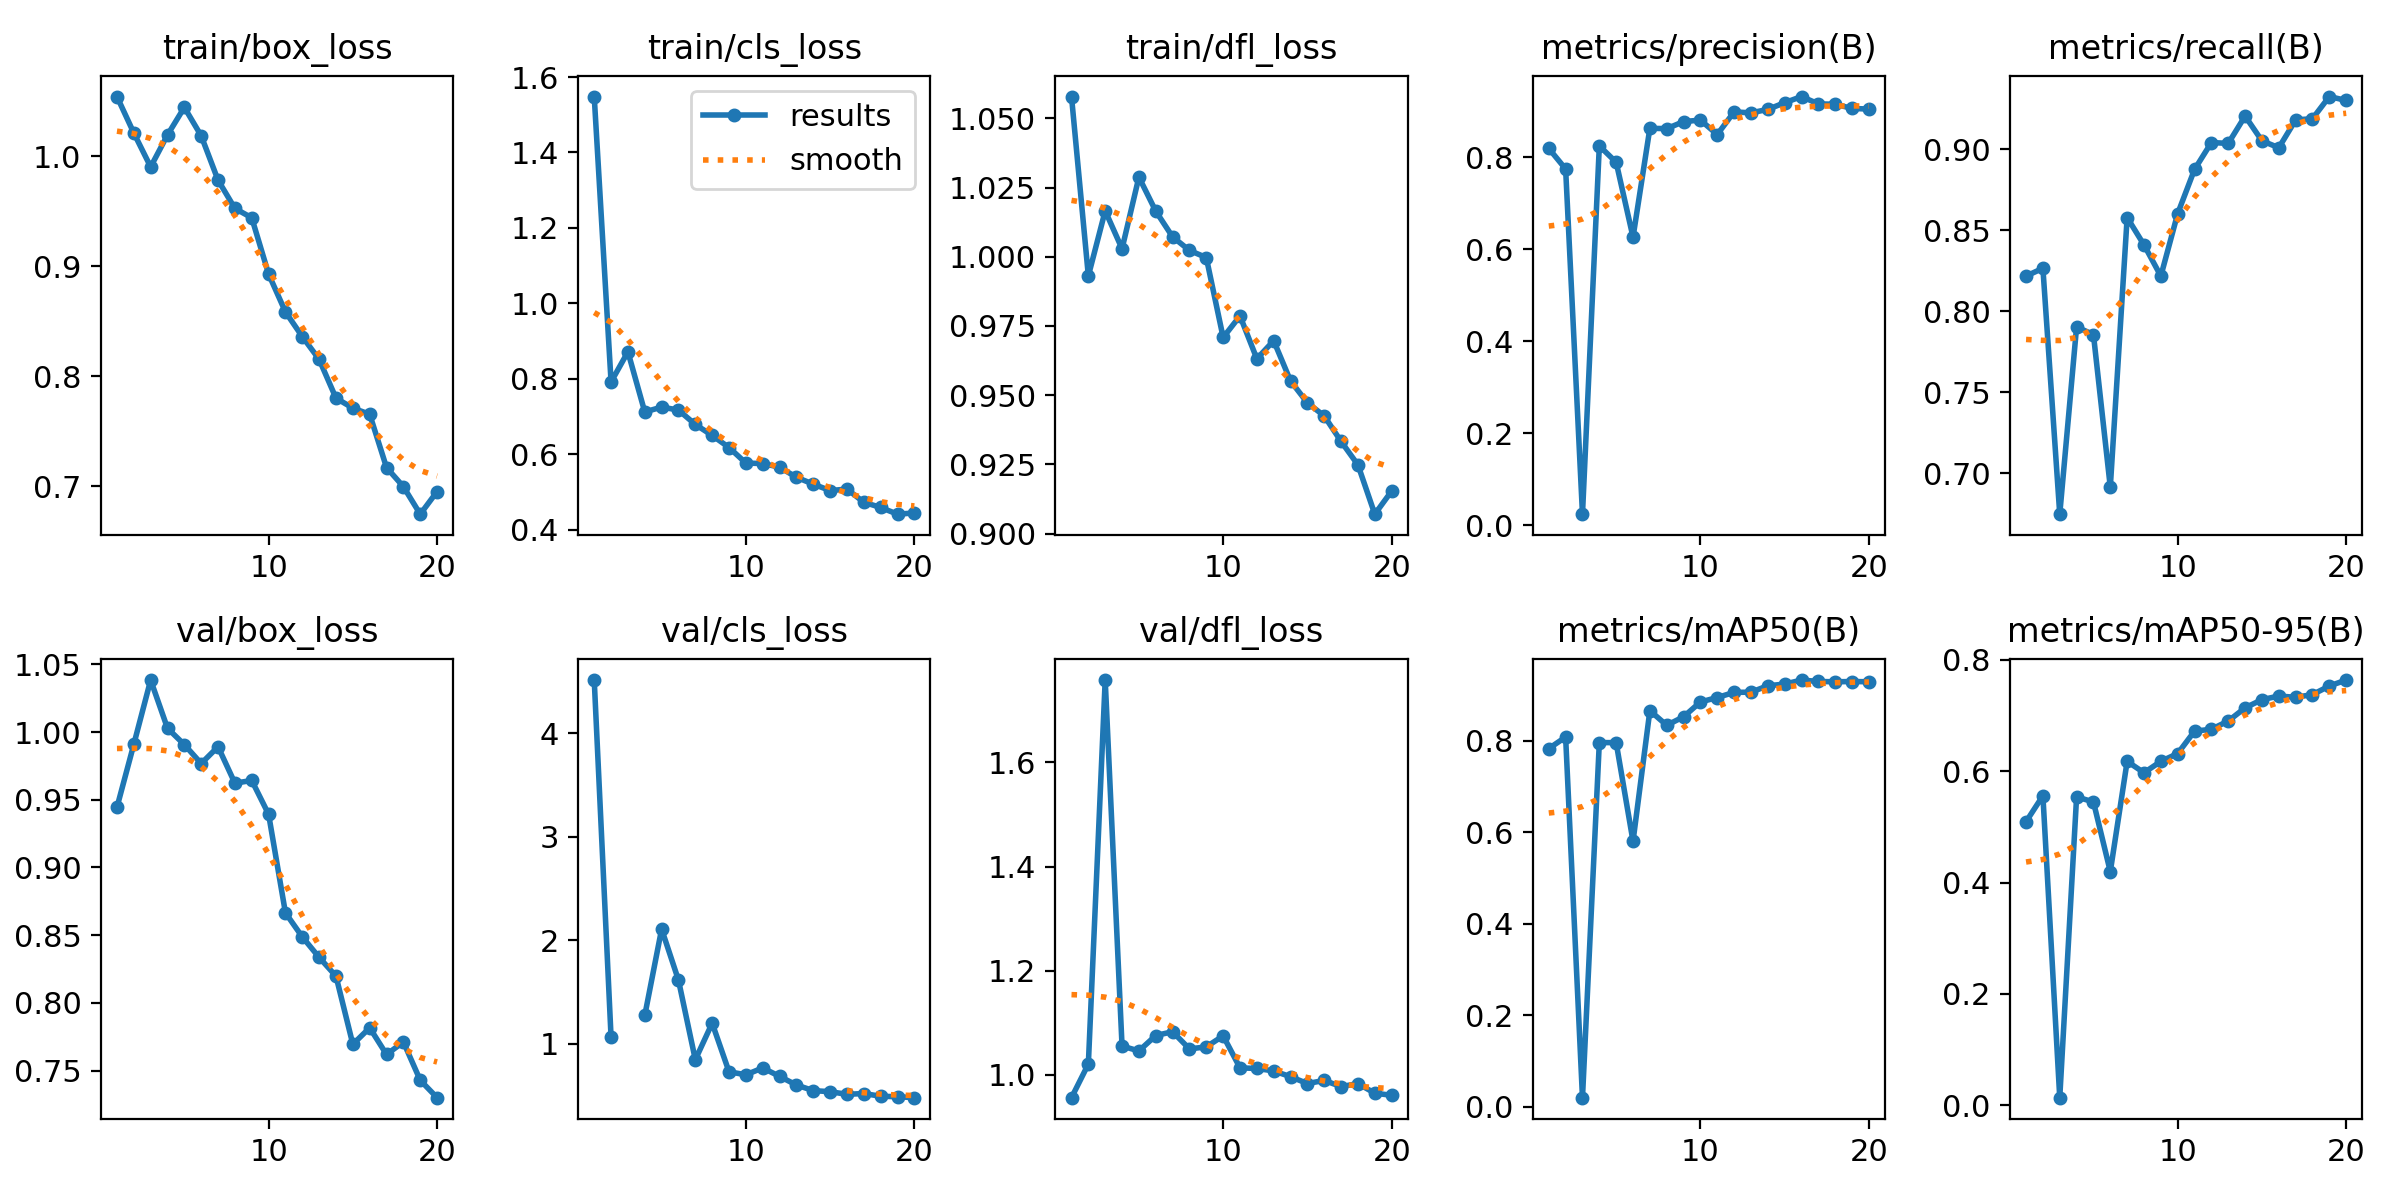

In [6]:
Image(filename=f'/content/runs/detect/train/results.png', width=1000)

In [7]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data='/content/drive/MyDrive/player-data/custom.yaml'

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/player-data/val/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:14<00:00,  3.51s/it]
                   all         58        415      0.902      0.928      0.929      0.763
Speed: 13.8ms preprocess, 53.6ms inference, 0.0ms loss, 22.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!zip -r '/content/player_detect_results.zip' '/content/runs/detect'

updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/val/ (stored 0%)
updating: content/runs/detect/val/confusion_matrix.png (deflated 38%)
updating: content/runs/detect/val/val_batch2_labels.jpg (deflated 7%)
updating: content/runs/detect/val/F1_curve.png (deflated 18%)
updating: content/runs/detect/val/P_curve.png (deflated 19%)
updating: content/runs/detect/val/R_curve.png (deflated 17%)
updating: content/runs/detect/val/val_batch1_pred.jpg (deflated 5%)
updating: content/runs/detect/val/val_batch2_pred.jpg (deflated 6%)
updating: content/runs/detect/val/confusion_matrix_normalized.png (deflated 37%)
updating: content/runs/detect/val/val_batch0_pred.jpg (deflated 3%)
updating: content/runs/detect/val/val_batch0_labels.jpg (deflated 3%)
updating: content/runs/detect/val/val_batch1_labels.jpg (deflated 5%)
updating: content/runs/detect/val/PR_curve.png (deflated 24%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/labels_correlo